In [21]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import plotly.express as px 

import seaborn as sns

palette = sns.color_palette("rainbow",8)

In [22]:
#Read the dataset
df = pd.read_csv("./Data/layoffs_data.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,IRL,SF Bay Area,Consumer,1.000000,2023-06-23,https://www.theinformation.com/articles/social-app-irl-which-raised-200-million-shuts-down-after-ceo-misconduct-probe,197.000000,Series C,2023-06-25 23:04:16,United States,nan,Unknown
1,Retool,SF Bay Area,Other,0.090000,2023-06-22,Internal memo,141.000000,Series C,2023-06-22 14:23:40,United States,nan,Unknown
2,Anaplan,SF Bay Area,Other,nan,2023-06-21,https://nypost.com/2023/06/23/software-giant-anaplan-begins-layoffs-after-thoma-bravos-10-4b-buyout-deal/,300.000000,Acquired,2023-06-24 03:48:00,United States,300.000000,Unknown
3,Uber,SF Bay Area,Transportation,nan,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-off-200-employees-in-recruitment-division,25200.000000,Post-IPO,2023-06-22 00:19:03,United States,200.000000,Unknown
4,Tackle.io,Boise,Infrastructure,nan,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.000000,Series C,2023-06-23 15:38:59,United States,75.000000,Unknown


In [23]:
#Data Exploration
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [24]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [25]:
#Create new column 'year_of_laidoff' tell us which layoff happend
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
    return year_list 

layoff_year_list = get_date()

df['year_of_laidOff']= layoff_year_list

In [26]:
#Data Cleaning
#Remove source 
df.drop(['Source','Date_Added','List_of_Employees_Laid_Off'], axis=1, inplace=True)

In [27]:
df=df[df['Laid_Off_Count'].notna()]
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,300.0,Acquired,United States,300.0,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,25200.0,Post-IPO,United States,200.0,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,148.0,Series C,United States,75.0,2023
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,2023
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,2023


In [28]:
#Analysis
#Did the recent layoffs primarily affect the US and not other countries? 
laidOff_countByCountry = df.groupby('Country', as_index =False).sum()
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

C:\Users\cangn\AppData\Local\Temp\ipykernel_22436\3513906813.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countByCountry = df.groupby('Country', as_index =False).sum()


In [29]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

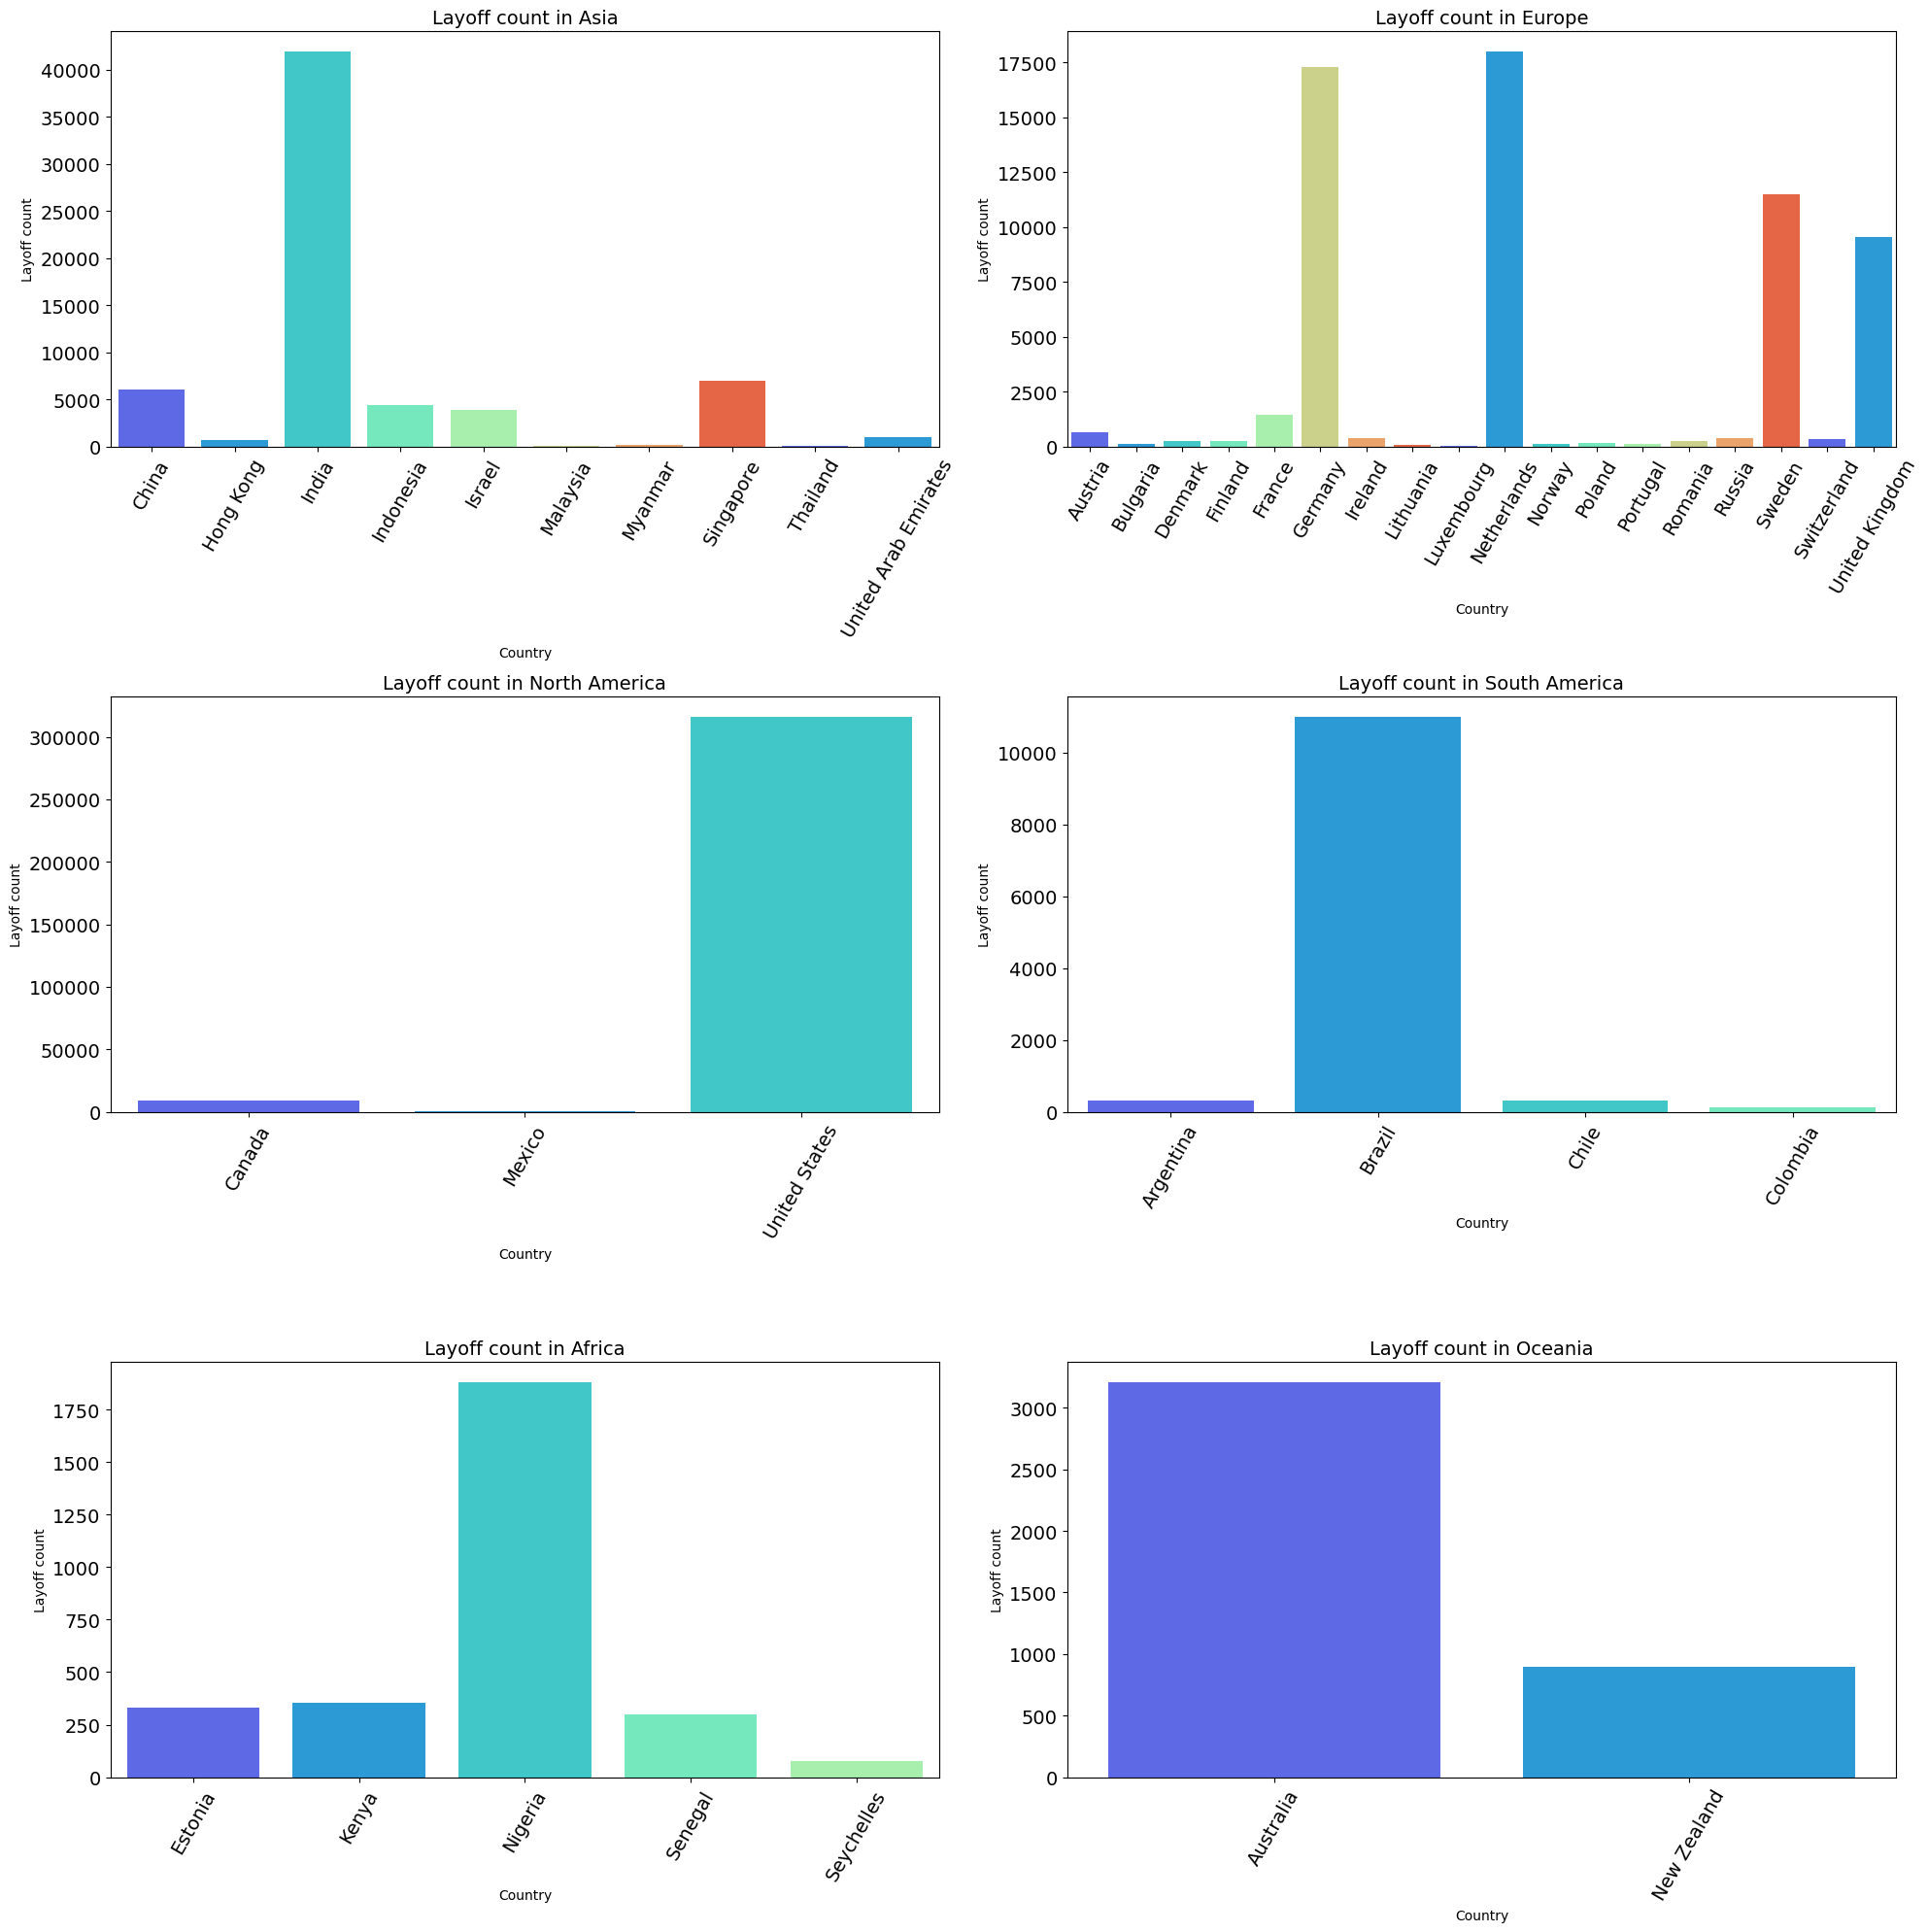

In [30]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

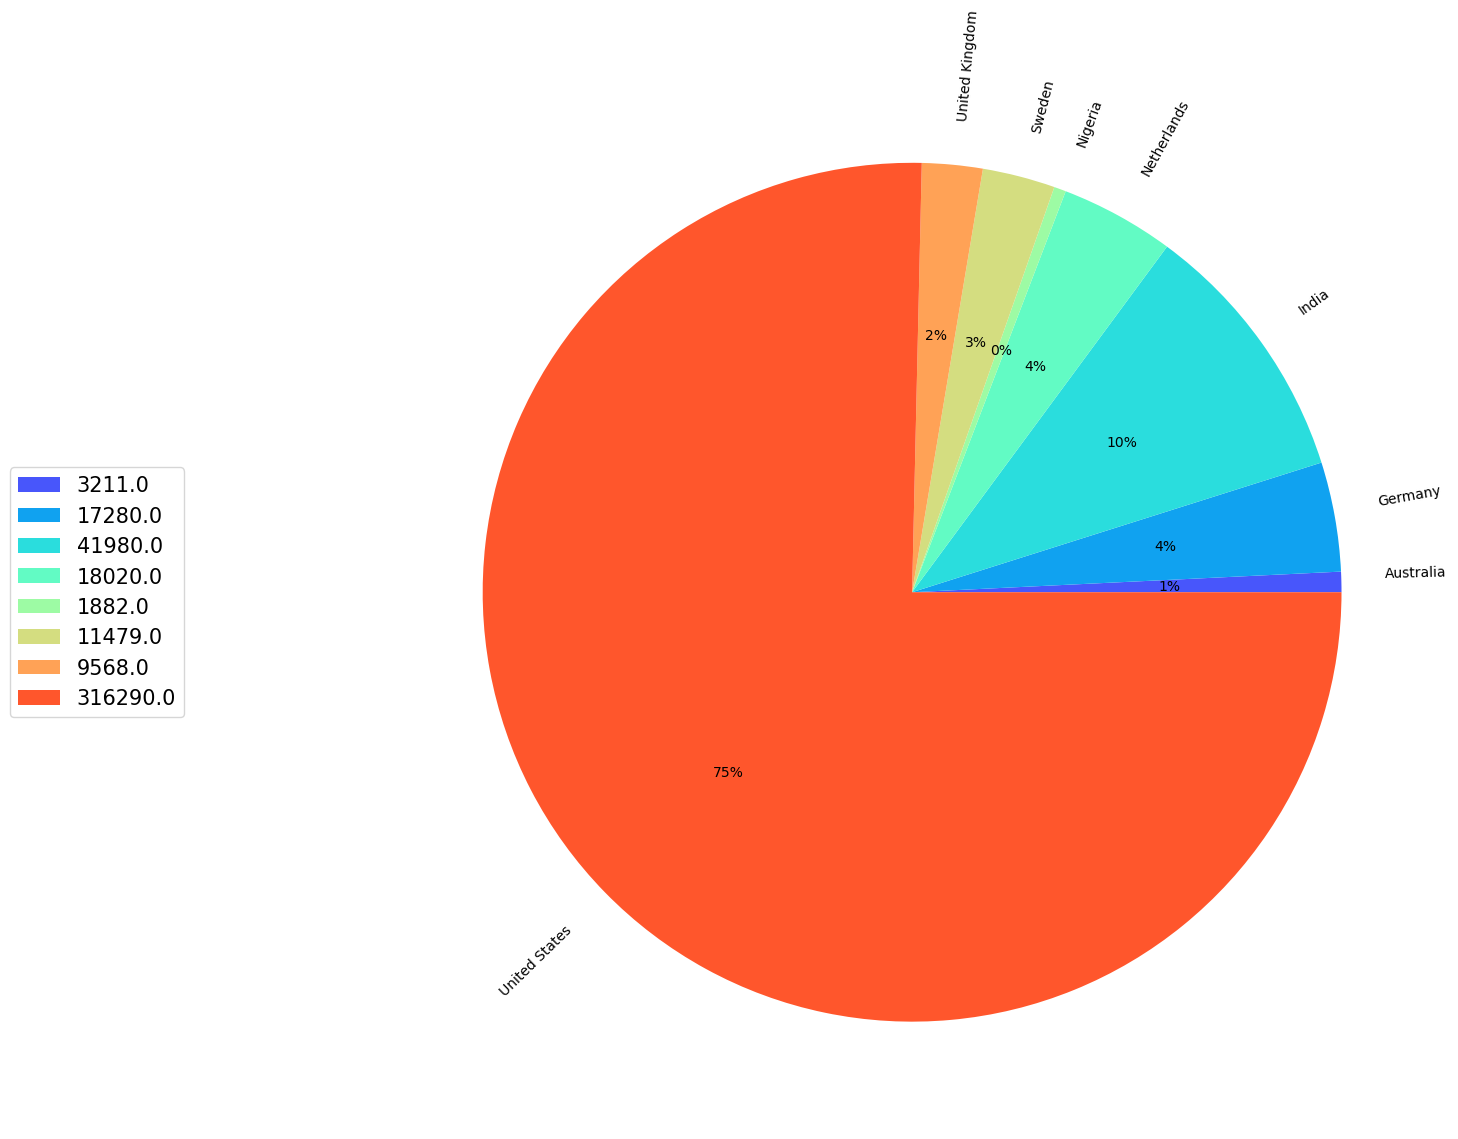

In [31]:
#Deeper Analysis
#USA layoffs compared to other countries.
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

C:\Users\cangn\AppData\Local\Temp\ipykernel_22436\1007967543.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()


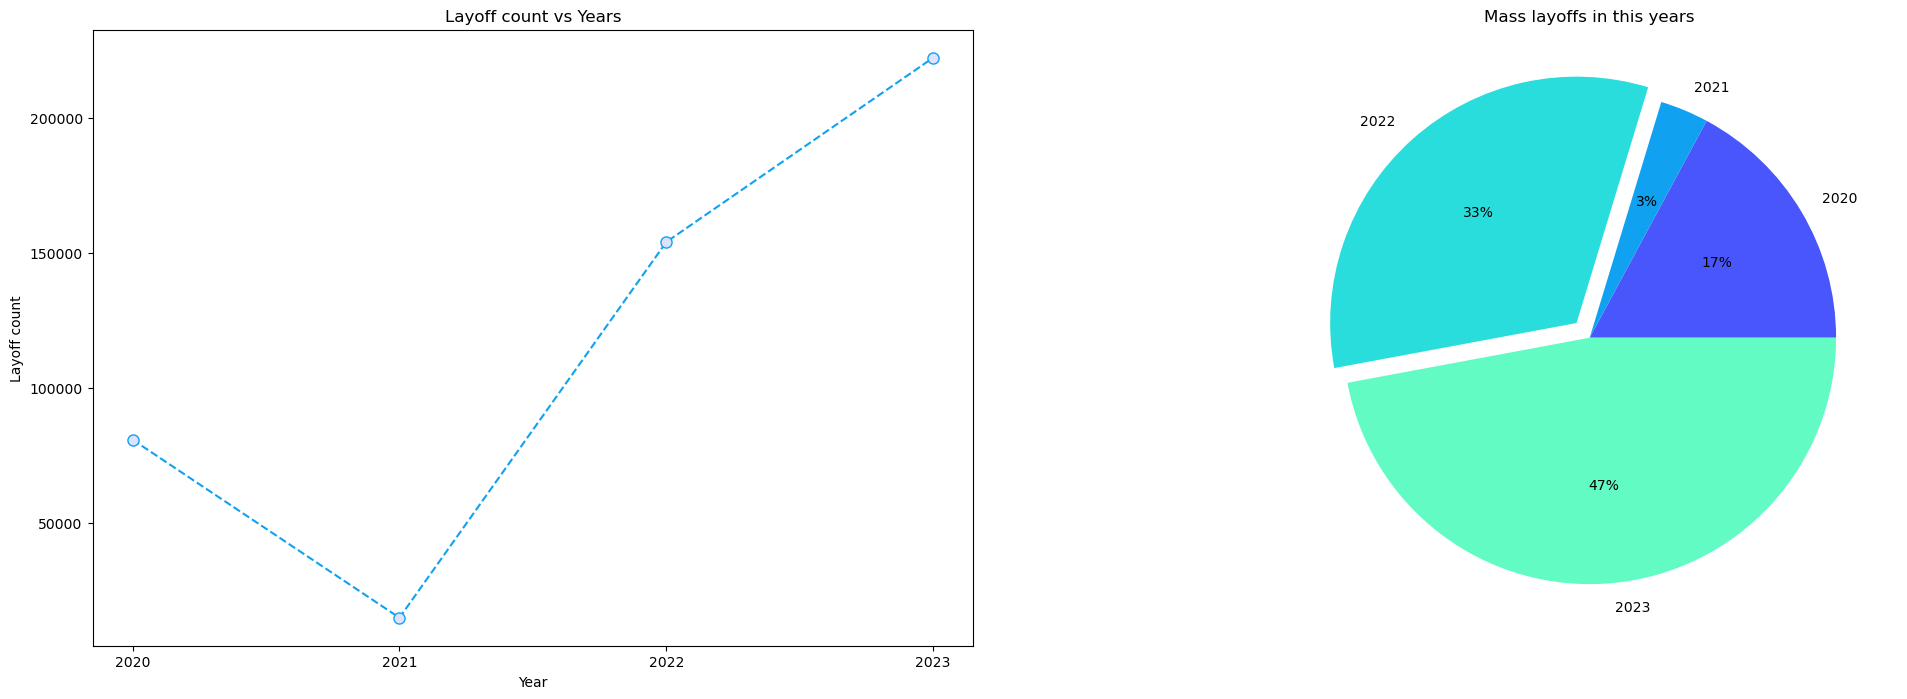

In [32]:
#Which year witnessed the highest number of layoffs? 
plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year'), plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

plt.pie(data=laidOff_countYear, x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode = [0, 0, 0.08, 0], colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

In [65]:
#Looking at company with 100% layoff rate 
insight_1 = df.loc[df['Percentage']==1.00].dropna()
insight_1.sort_values(by='Laid_Off_Count',ascending=False)
insight_1.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
22,Bitwise,SF Bay Area,Crypto,1.0,2023-06-14,84.0,Series B,United States,900.0,2023
232,Milkrun,Sydney,Food,1.0,2023-04-11,86.0,Series A,Australia,400.0,2023
461,Dropp,Berlin,Retail,1.0,2023-02-14,2.0,Unknown,Germany,60.0,2023
511,Openpay,Melbourne,Finance,1.0,2023-02-07,299.0,Post-IPO,Australia,83.0,2023
710,Britishvolt,London,Transportation,1.0,2023-01-17,2400.0,Unknown,United Kingdom,206.0,2023


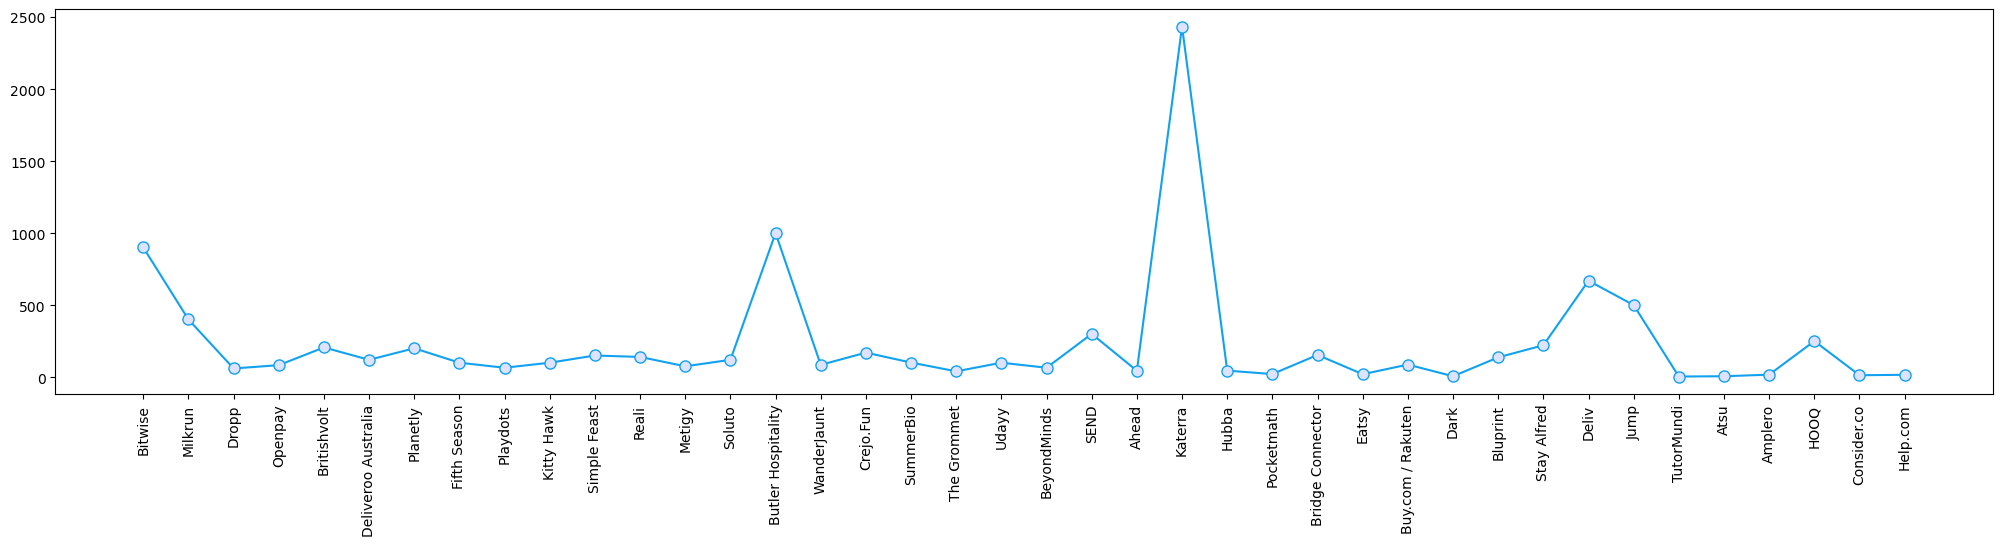

In [40]:
plt.figure(figsize=(25,5))

plt.plot(insight_1['Company'], insight_1['Laid_Off_Count'], marker="o", linestyle='-', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)

plt.show()

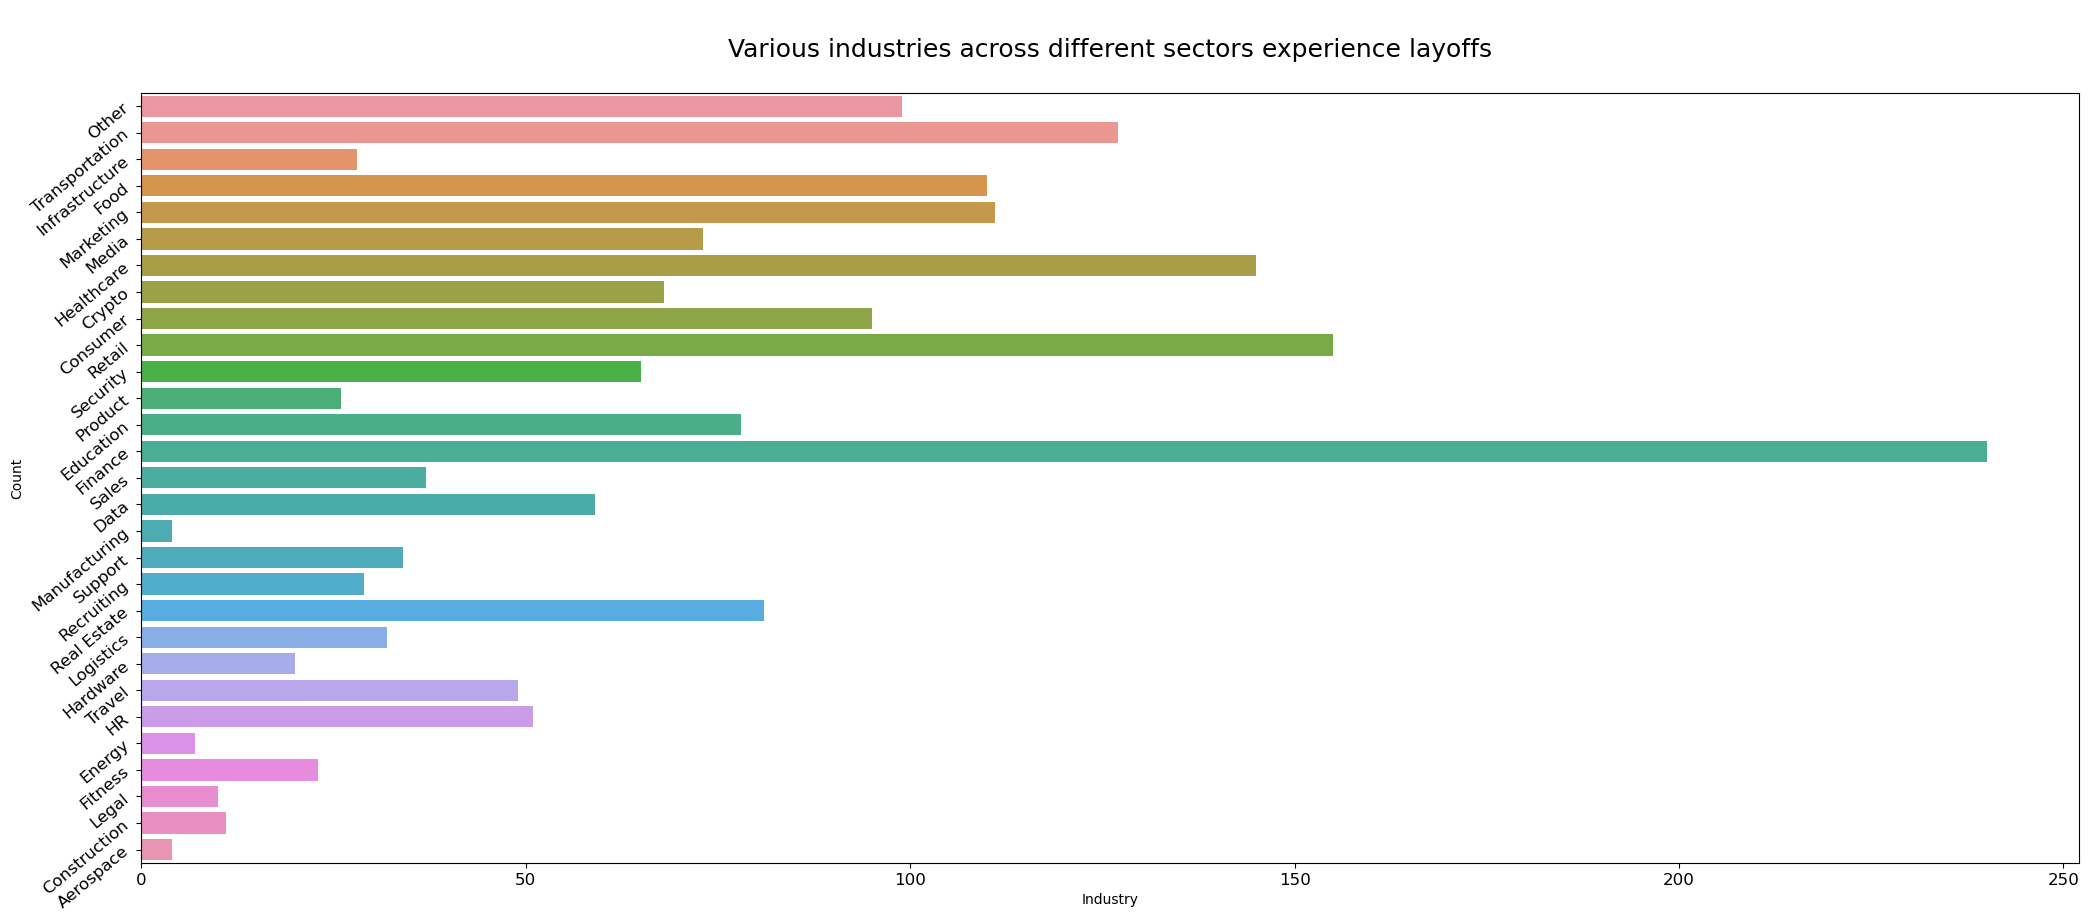

In [95]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=df)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nVarious industries across different sectors experience layoffs\n", fontsize=18)

plt.show()

In [66]:
grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]

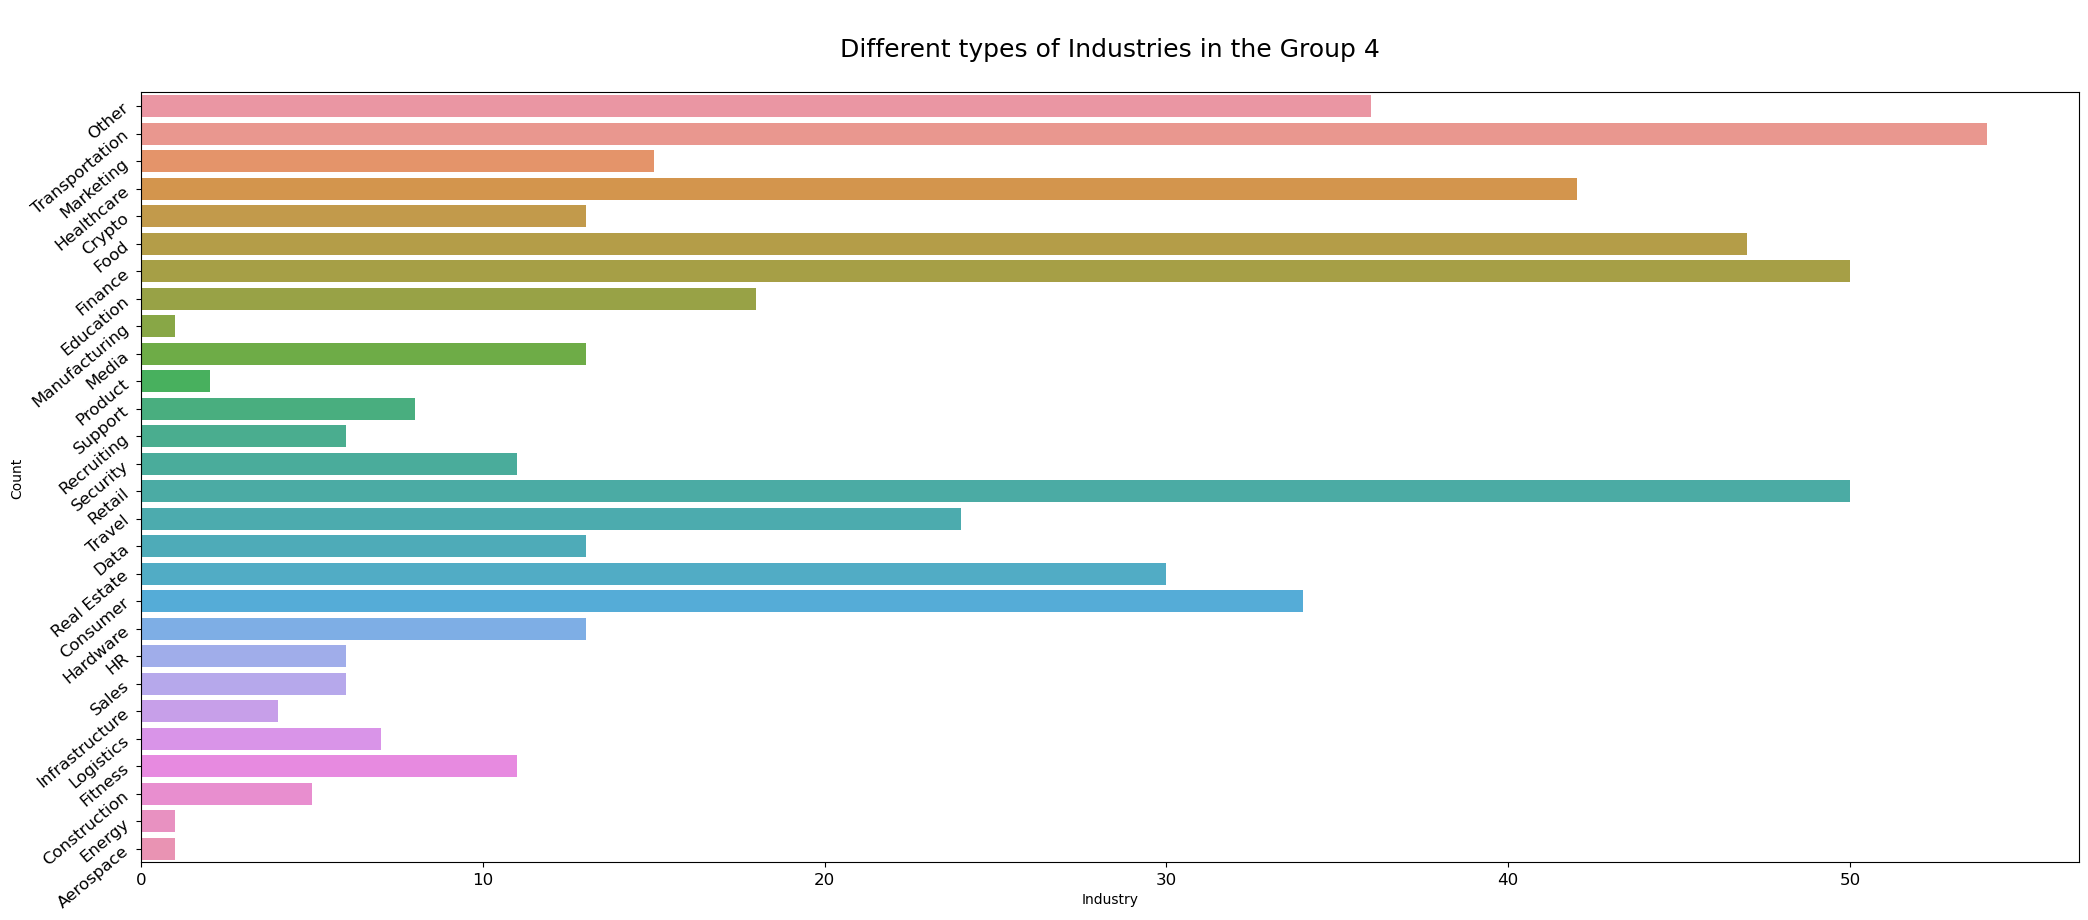

In [91]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

In [83]:
#Top Layoffs companies in Group 4 (> 154 layoff count)
top_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
# top10_comp.groupby('Company')['Laid_Off_Count'].sum()
top_comp = top_comp.head(10)
top_comp


,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
651,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023
1126,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022
328,Meta,SF Bay Area,Consumer,NaN,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023
1058,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022
684,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023
311,Amazon,Seattle,Retail,NaN,2023-03-20,108.0,Post-IPO,United States,9000.0,2023
397,Ericsson,Stockholm,Other,0.08,2023-02-24,663.0,Post-IPO,Sweden,8500.0,2023
193,Flink,Berlin,Food,0.40,2023-04-24,1000.0,Series B,Germany,8000.0,2023
824,Amazon,Seattle,Retail,0.02,2023-01-04,108.0,Post-IPO,United States,8000.0,2023
825,Salesforce,SF Bay Area,Sales,0.10,2023-01-04,65.0,Post-IPO,United States,8000.0,2023


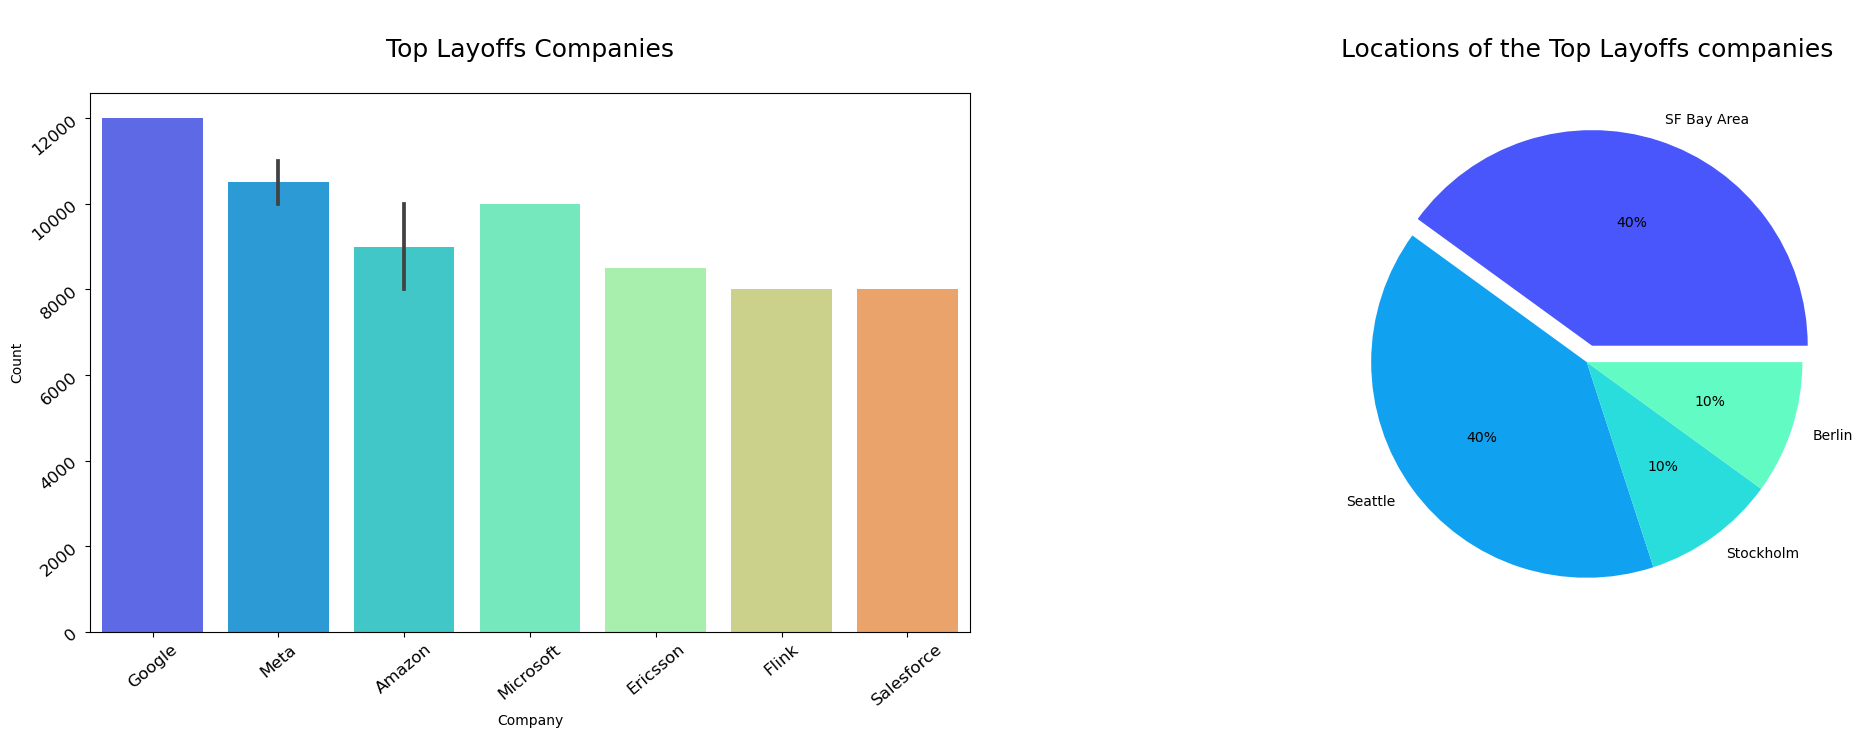

In [85]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top_comp['Company'], y=top_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nTop Layoffs Companies\n", fontsize=18)

plt.subplot(1, 2, 2)
top_comp_loca = top_comp['Location_HQ'].value_counts()
plt.pie(data=top_comp, x=top_comp_loca.values, labels=top_comp_loca.index, autopct='%.f%%',  explode = [0.08, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top Layoffs companies\n", fontsize=18)

plt.show()

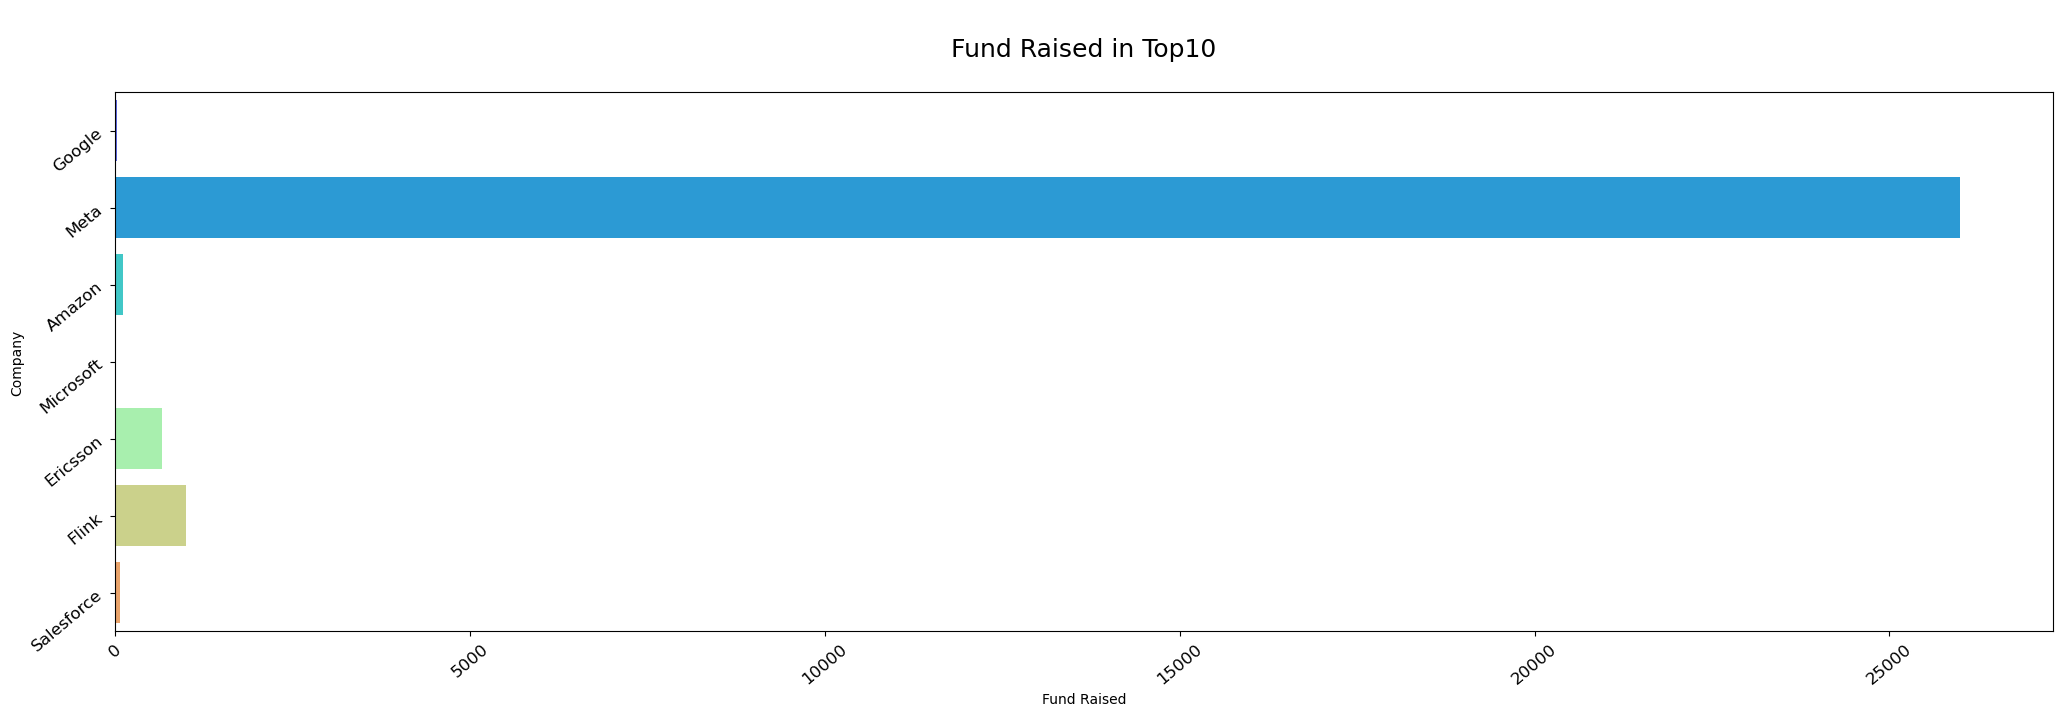

In [89]:
#Deep Dive Analysis
#Top layoff companies Funds Raised
plt.figure(figsize=(25,7))

sns.barplot(data=top_comp, y=top_comp['Company'], x=top_comp['Funds_Raised'].astype(str).astype(float), palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()